# Pytorch

In [20]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (pd.read_csv)
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

In [21]:
data = pd.read_csv("D:/KULIAH/Sem 7/AI/Tugas Pytorch/Salary_Data.csv")
data

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891
5,2.9,23.0,56642
6,3.0,23.0,60150
7,3.2,23.3,54445
8,3.2,23.3,64445
9,3.7,23.6,57189


In [22]:
# Memastikan tidak ada data yang berisi null
data.isnull().sum()

YearsExperience    0
Age                0
Salary             0
dtype: int64

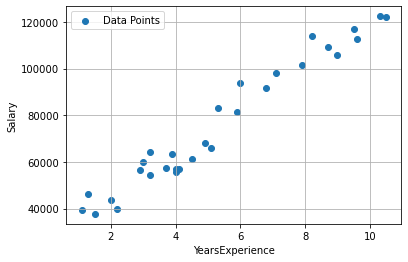

In [23]:
X = data['YearsExperience'].tolist()
Y = data['Salary'].tolist()

plt.scatter(X, Y, label='Data Points')
plt.grid()
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [24]:
# n = data.shape[0]
# X = np.ones((n, 2)) # dtype='int64')
# X[:,0] = data['YearsExperience'].values
# X[:,1] = data['Age'].values

X_train = data['YearsExperience'].values
Y_train = data['Salary'].values

## Model

In [25]:
class LR(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
    def forward(self, X):
        pred = self.linear(X)
        return pred

model = LR(1, 1)  # jumlah input features dan output features
print(list(model.parameters()))

# model = nn.Linear(2, 1)
# print(model.weight)
# print(model.bias)

[Parameter containing:
tensor([[0.7472]], requires_grad=True), Parameter containing:
tensor([0.0481], requires_grad=True)]


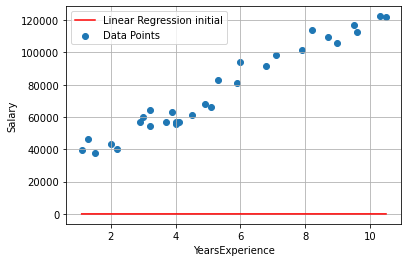

In [26]:
def get_params():
    return w[0][0].item(), b[0].item() # mengubah menjadi skalar

[w, b] = model.parameters()
w, b = get_params()
# x1 = np.linspace (np.min(X_train), np.max(X_train))
x1 = np.array(X_train)
# w = 0.83245
# b = 0.12345
y1 = w*x1 + b

plt.plot(x1, y1, color='red',label='Linear Regression initial') #plotting
plt.scatter(X_train, Y_train, label='Data Points')
plt.grid()
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [27]:
criterion = nn.MSELoss() # mean squared error loss function
optimizer = torch.optim.SGD(model.parameters(), lr= 0.01) # SGD = Stochastic gradient descent, lr = learning rate

In [28]:
# X_tensor = X_tensor.view(-1,1)
# X_tensor
# y_train = torch.from_numpy(Y_train)
X_train = np.array(X_train, dtype='float32')
Y_train = np.array(Y_train, dtype='float32')


# X_tensor = torch.from_numpy(X_train)
# y_train = torch.from_numpy(Y_train)
# X_tensor.view(-1,1)

X_train = X_train.reshape(-1,1)
Y_train = Y_train.reshape(-1,1)


In [29]:
loss_record =[]
epochs = 1000

for epochs_num in range (epochs):
    X = torch.from_numpy(X_train).requires_grad_()
    y = torch.from_numpy(Y_train)
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    print(f"Epochs : {epochs_num}, Loss : {loss}")
    loss_record.append(loss)   # simpan nilai loss
    optimizer.zero_grad() # sets gradients ke nol 
    loss.backward()       # back propagation (menghitung gradien dari func loss)
    optimizer.step()      # update parameter

Epochs : 0, Loss : 6502234112.0
Epochs : 1, Loss : 595423808.0
Epochs : 2, Loss : 183105168.0
Epochs : 3, Loss : 153440320.0
Epochs : 4, Loss : 150432208.0
Epochs : 5, Loss : 149288448.0
Epochs : 6, Loss : 148282448.0
Epochs : 7, Loss : 147293872.0
Epochs : 8, Loss : 146314240.0
Epochs : 9, Loss : 145342912.0
Epochs : 10, Loss : 144379808.0
Epochs : 11, Loss : 143424816.0
Epochs : 12, Loss : 142477856.0
Epochs : 13, Loss : 141538976.0
Epochs : 14, Loss : 140607936.0
Epochs : 15, Loss : 139684832.0
Epochs : 16, Loss : 138769488.0
Epochs : 17, Loss : 137861856.0
Epochs : 18, Loss : 136961936.0
Epochs : 19, Loss : 136069584.0
Epochs : 20, Loss : 135184720.0
Epochs : 21, Loss : 134307376.0
Epochs : 22, Loss : 133437448.0
Epochs : 23, Loss : 132574848.0
Epochs : 24, Loss : 131719528.0
Epochs : 25, Loss : 130871416.0
Epochs : 26, Loss : 130030544.0
Epochs : 27, Loss : 129196672.0
Epochs : 28, Loss : 128369880.0
Epochs : 29, Loss : 127550080.0
Epochs : 30, Loss : 126737176.0
Epochs : 31, Loss

In [30]:
def plot_modul(judul):
    plt.title = judul
    w, b = get_params()
    X1 = np.linspace (np.min(X_train), np.max(X_train))
    Y1 = w*X1 + b
    plt.plot(X1, Y1, 'r')
    plt.scatter(X_train, Y_train)

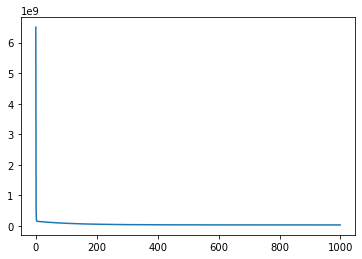

In [31]:
%matplotlib inline
loss_record = [ loss.detach().numpy() for loss in loss_record]
plt.plot(loss_record)

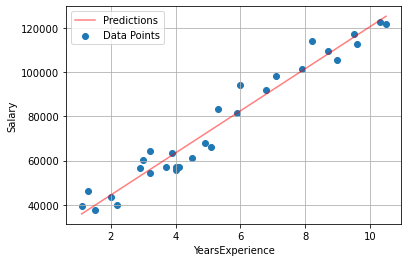

In [36]:
plt.clf()

# Get predictions
predicted = model(torch.from_numpy(X_train).requires_grad_()).data.numpy()

plt.scatter(X_train, Y_train, label='Data Points')
plt.plot(X_train, predicted, 'r', label='Predictions', alpha=0.5)
plt.grid()
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.legend(loc='best')
plt.show()

In [33]:
y


tensor([[ 39343.],
        [ 46205.],
        [ 37731.],
        [ 43525.],
        [ 39891.],
        [ 56642.],
        [ 60150.],
        [ 54445.],
        [ 64445.],
        [ 57189.],
        [ 63218.],
        [ 55794.],
        [ 56957.],
        [ 57081.],
        [ 61111.],
        [ 67938.],
        [ 66029.],
        [ 83088.],
        [ 81363.],
        [ 93940.],
        [ 91738.],
        [ 98273.],
        [101302.],
        [113812.],
        [109431.],
        [105582.],
        [116969.],
        [112635.],
        [122391.],
        [121872.]])

In [34]:
predicted

array([[ 35899.297],
       [ 37799.5  ],
       [ 39699.703],
       [ 44450.21 ],
       [ 46350.414],
       [ 53001.125],
       [ 53951.223],
       [ 55851.426],
       [ 55851.426],
       [ 60601.93 ],
       [ 62502.133],
       [ 63452.234],
       [ 63452.234],
       [ 64402.336],
       [ 68202.74 ],
       [ 72003.15 ],
       [ 73903.35 ],
       [ 75803.555],
       [ 81504.164],
       [ 82454.266],
       [ 90055.08 ],
       [ 92905.375],
       [100506.19 ],
       [103356.49 ],
       [108107.   ],
       [110957.305],
       [115707.81 ],
       [116657.914],
       [123308.625],
       [125208.82 ]], dtype=float32)

In [35]:
from sklearn.metrics import r2_score
test_accuracy=r2_score(y.numpy(), predicted)
print(f'Accuracy: {test_accuracy}')

Accuracy: 0.9569214532017362
